<a href="https://colab.research.google.com/github/RohitKumar2705/GANS/blob/main/FIRST_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape, LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam

In [5]:
img_rows = 28
img_cols = 28
channels = 1

img_shape =  (img_rows,img_cols,channels)
z_dim = 100



In [6]:
def build_generator(img_shape,z_dim):
  model = Sequential()

  # fully connected layer
  model.add(Dense(128,input_dim = z_dim))

  # leaky activation
  model.add(LeakyReLU(alpha = 0.01))

  # output layer with tanhh activation
  model.add(Dense(28*28*1,activation = 'tanh'))

  model.add(Reshape(img_shape))

  return model



In [7]:
def build_discriminator(img_shape):
  model = Sequential()

  # flatten
  model.add(Flatten(input_shape = img_shape))

  # fully connected layer
  model.add(Dense(128))

  # leaky relu activation
  model.add(LeakyReLU(alpha = 0.01))

  # sigmoid function
  model.add(Dense(1,activation = 'sigmoid'))

  return model


In [8]:
def build_gan(generator,discriminator):
  model = Sequential()
  model.add(generator)
  model.add(discriminator)
  return model


In [16]:
from jax._src.api import F
# build and compile the model
discriminator = build_discriminator(img_shape)
discriminator.compile(loss = 'binary_crossentropy',optimizer = Adam(),metrics = ['accuracy'])

# build the generator
generator = build_generator(img_shape,z_dim)

discriminator.trainable = False

# build and compile gan
gan = build_gan(generator,discriminator)
gan.compile(loss = 'binary_crossentropy',optimizer = Adam())


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# training
losses = []
accuracies = []
iteration_checkpoints = []

def train(iterations,batch_size,sample_interval):
  # load the mnist dataset
  (X_train,_),(_,_) = mnist.load_data()

  X_train = X_train/127.5 - 1.0
  X_train = np.expand_dims(X_train,axis = 3)

  real = np.ones((batch_size,1))

  fake = np.zeros((batch_size,1))

  for iteration in range(iterations):
    idx = np.random.randint(0,X_train.shape[0],batch_size)
    imgs = X_train[idx]

    z = np.random.normal(0,1,(batch_size,100))
    gen_imgs = generator.predict(z)

    # train discriminator
    d_loss_real = discriminator.train_on_batch(imgs,real)
    d_loss_fake = discriminator.train_on_batch(gen_imgs,fake)
    d_loss,accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)


    # generator
    z = np.random.normal(0,1,(batch_size,100))
    gen_imgs = generator.predict(z)

    # train generator\
    g_loss = gan.train_on_batch(z,real)

    if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # Output a sample of generated image
            sample_images(generator)


In [18]:
def sample_images(generator,image_grid_rows = 4,image_grid_columns = 4):

  # sample random noise
  z = np.random.normal(0,1,(image_grid_rows * image_grid_columns, z_dim))

  # generator images from random noise
  gen_imgs = generator.predict(z)

  # rescale image pixcel
  gen_imgs = 0.5*gen_imgs + 0.5

  fig,axs = plt.subplots(image_grid_rows,image_grid_columns,figsize = (4,4),sharey = True,sharex = True)

  cnt = 0
  for i in range(image_grid_rows):
    for j in range(image_grid_columns):
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
      axs[i, j].axis('off')
      cnt += 1

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━

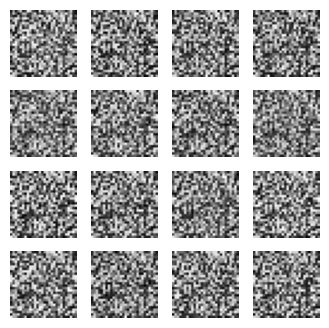

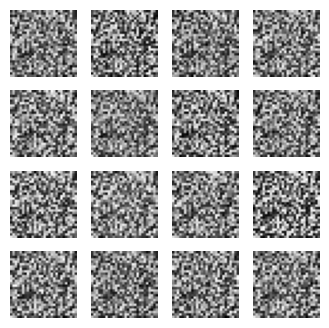

In [22]:
# Set hyperparameters
iterations = 200
batch_size = 128
sample_interval = 100

# Re-initialize lists before training
losses = []
accuracies = []
iteration_checkpoints = []

# Train the GAN for the specified number of iterations
train(iterations, batch_size, sample_interval)

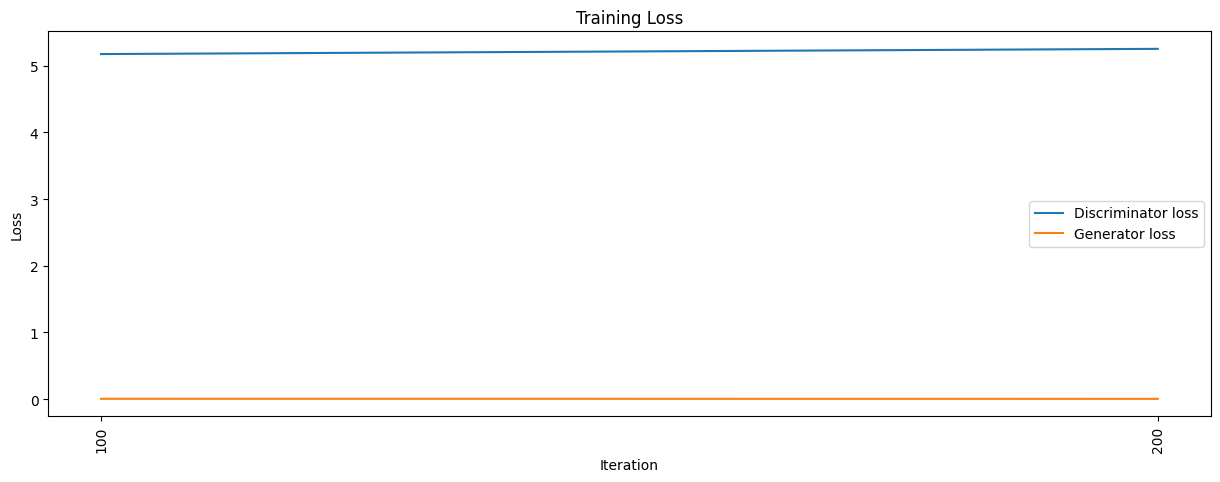

In [23]:
losses = np.array(losses)

# Plot training losses for Discriminator and Generator
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

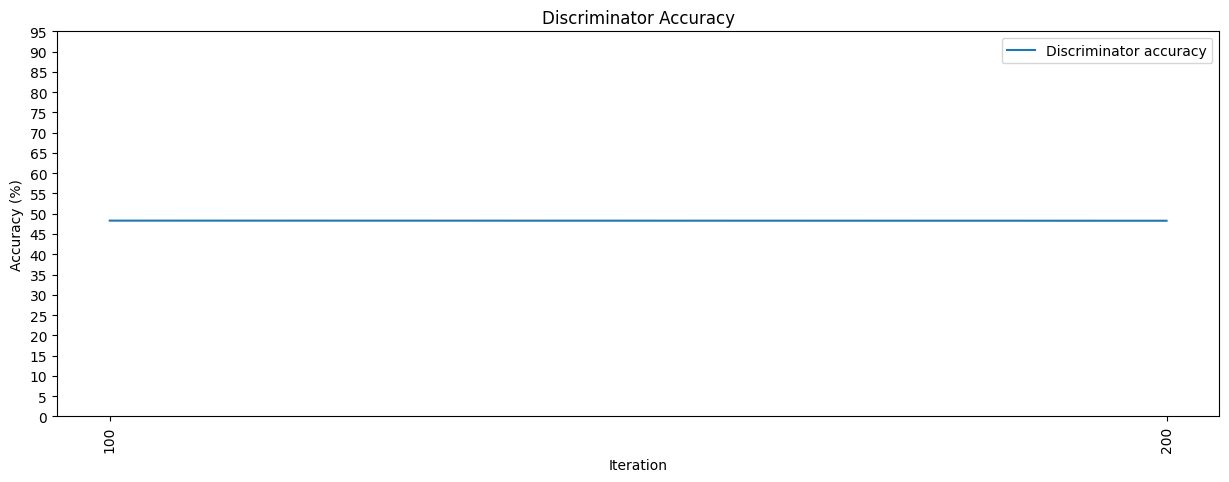

In [24]:
accuracies = np.array(accuracies)

# Plot Discriminator accuracy
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()